# Выполнил: Баталов Кирилл Дмитриевич РИ-320941

# Задача -  Нужно определять выживет или не выживет пассажир на Титанике. 

## Импорт необходимых библиотек


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

### Загрузка датасета

In [144]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 📊 Исследовательский анализ данных (EDA)

In [145]:
# Проверка информации о датасете
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
# Статистическая сводка
print("\nСтатистическая сводка:")
df.describe()


Статистическая сводка:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Изображение данных

In [147]:
# Настраиваем стиль графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [148]:
# 1. ГИСТОГРАММЫ для числовых признаков
# Выбираем числовые признаки
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'PassengerId']

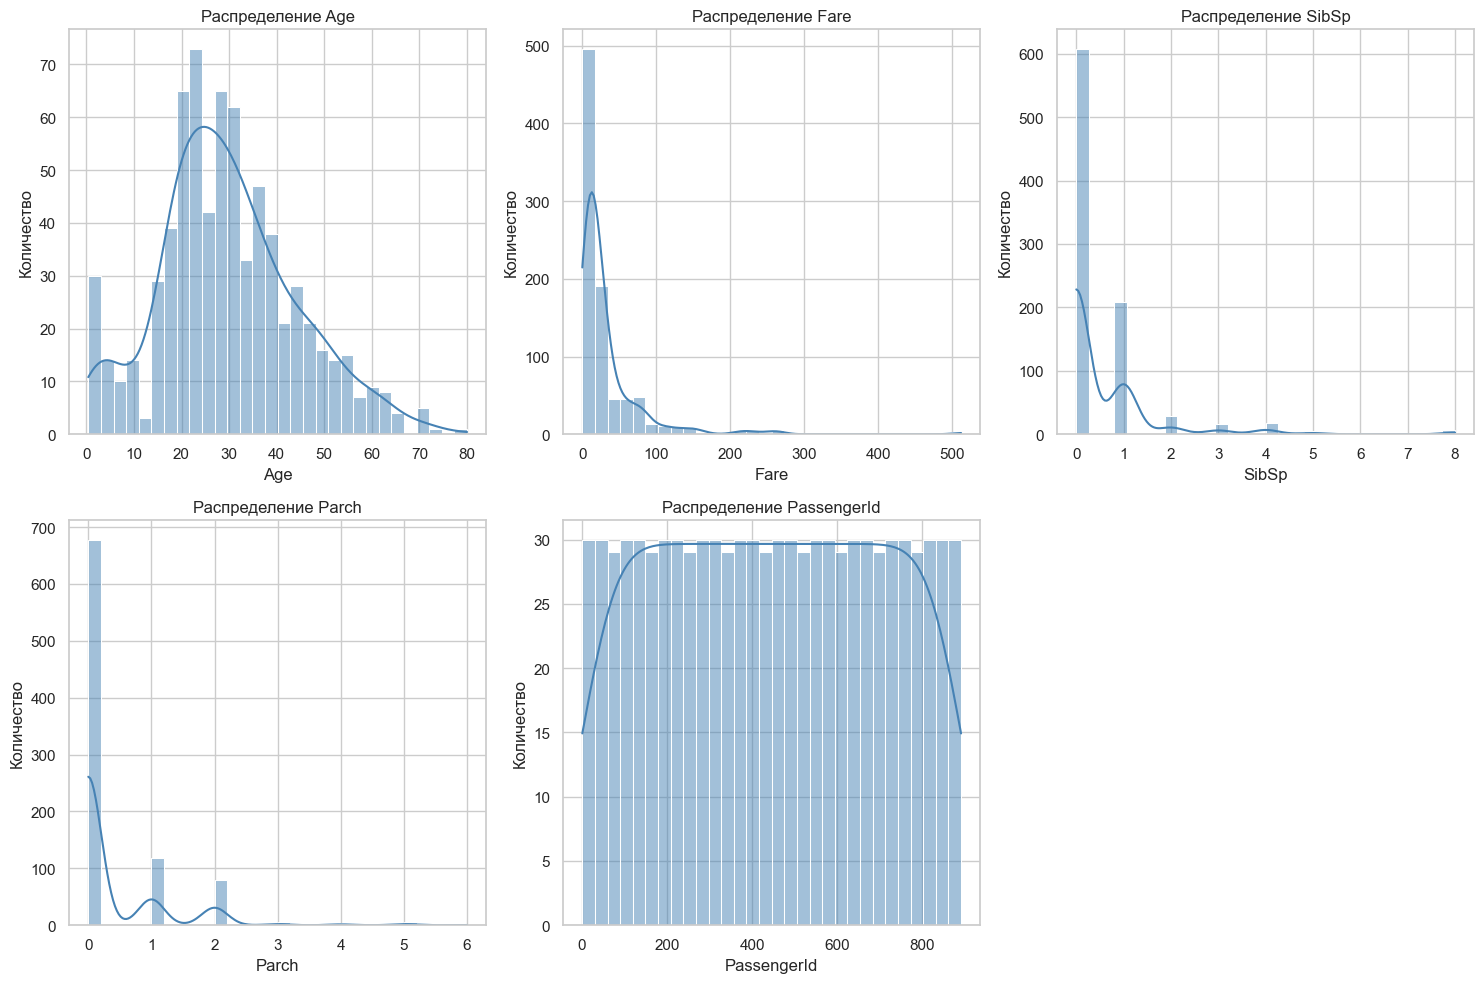

In [149]:
# Отрисовываем гистограммы
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='steelblue')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()


#### Выводы по представленным диаграммам

#### Распределение Age (Возраста):

Распределение возраста имеет нормальную форму с пиком около 20-30 лет

Большинство пассажиров были молодыми и среднего возраста (20-40 лет)

Наблюдается небольшое количество детей (0-10 лет) и пожилых пассажиров (старше 60 лет)

Отсутствуют явные выбросы в данных по возрасту


#### Распределение Fare (Стоимость билета):

Распределение со смещением в сторону малых значений

Большинство пассажиров (~500 человек) имели билеты с низкой стоимостью (до 50 единиц)

Небольшое количество пассажиров приобрели очень дорогие билеты (более 200 единиц)

Наличие выбросов в правой части распределения указывает на билеты премиум-класса (стоимостью 500)

Логарифмическое преобразование может быть полезным для этого признака при моделировании


#### Распределение SibSp (Количество братьев/сестер/супругов):

Большинство пассажиров (~600) путешествовали без братьев/сестер/супругов (значение 0)

Значительное количество (~200) имели одного спутника (значение 1)

Очень мало пассажиров имели больше 3 братьев/сестер/супругов

Дискретное распределение с сильным смещением в сторону малых значений

Наблюдаются небольшие выбросы при значениях 4, 5 и 8


#### Распределение Parch (Количество родителей/детей):

Подавляющее большинство пассажиров (~680) путешествовали без родителей/детей (значение 0)

Около 120 пассажиров имели одного ребенка/родителя

Небольшое количество пассажиров имели 2-3 детей/родителей

Дискретное распределение с очень сильным смещением к нулевому значению

Практически нет пассажиров с более чем 3 детьми/родителями


#### Распределение PassengerId:

Равномерное распределение по всему диапазону значений 

Это ожидаемо, поскольку PassengerId - это просто порядковый идентификатор

Все идентификаторы представлены примерно с одинаковой частотой (~30 наблюдений в каждом бине)

Этот признак не несет информативной ценности для анализа или моделирования

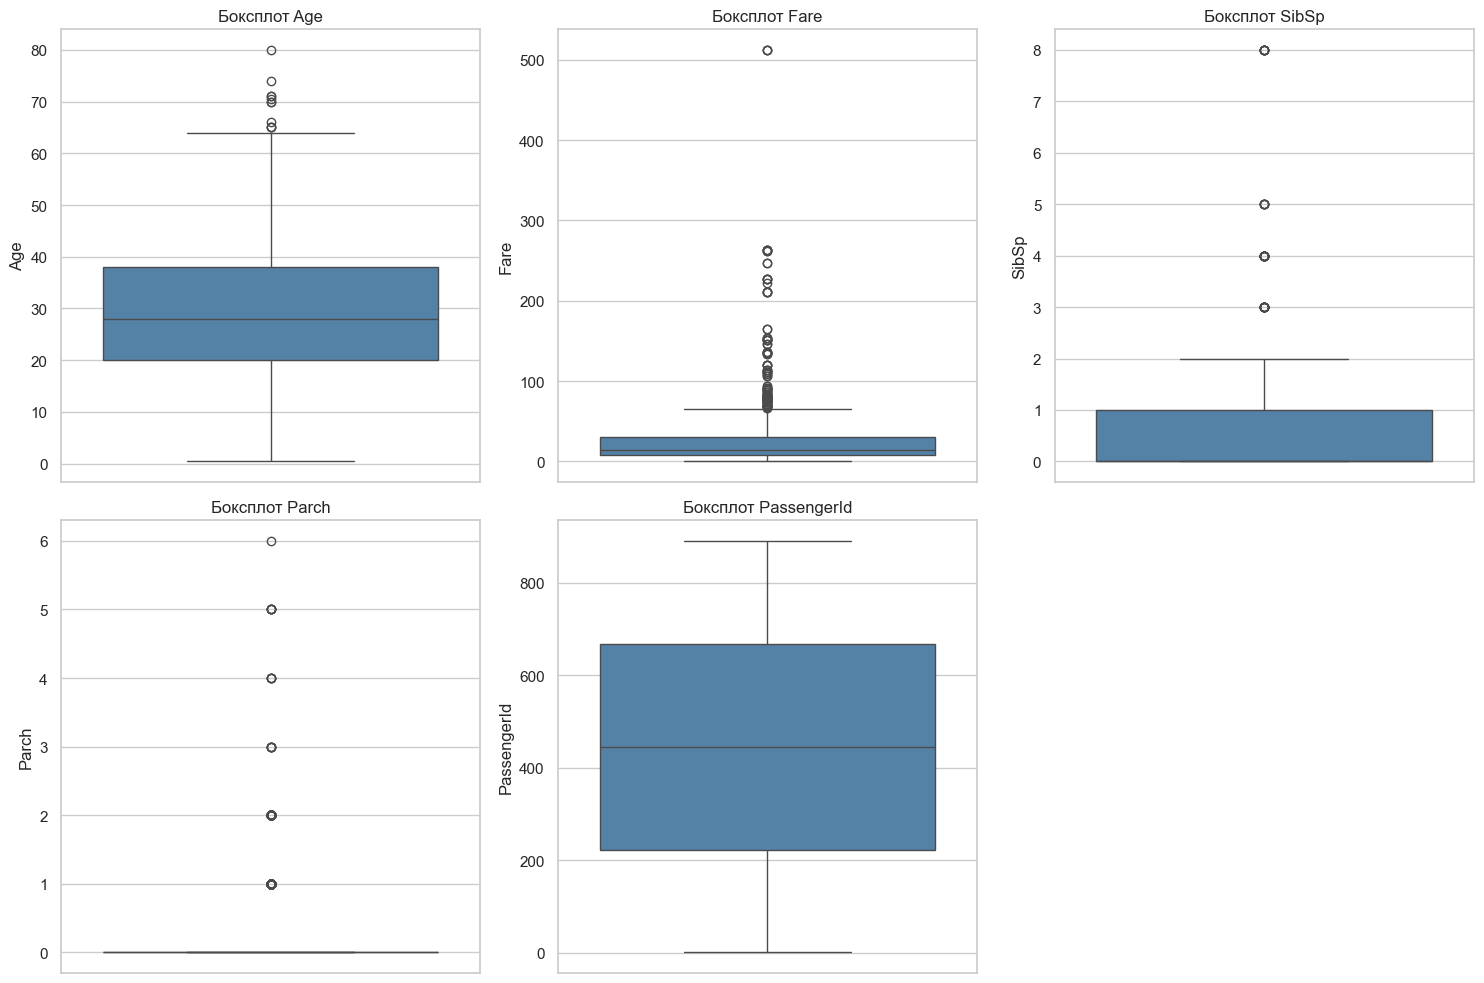

In [150]:
# 2. ЯЩИКИ С УСАМИ (БОКСПЛОТЫ)

# Подробные боксплоты для каждого признака отдельно
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[feature], color='steelblue')
    plt.title(f'Боксплот {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Видим все те же выбросы в Fare, SibSp. Можно также посчитать выбросом значение 80 в Age.

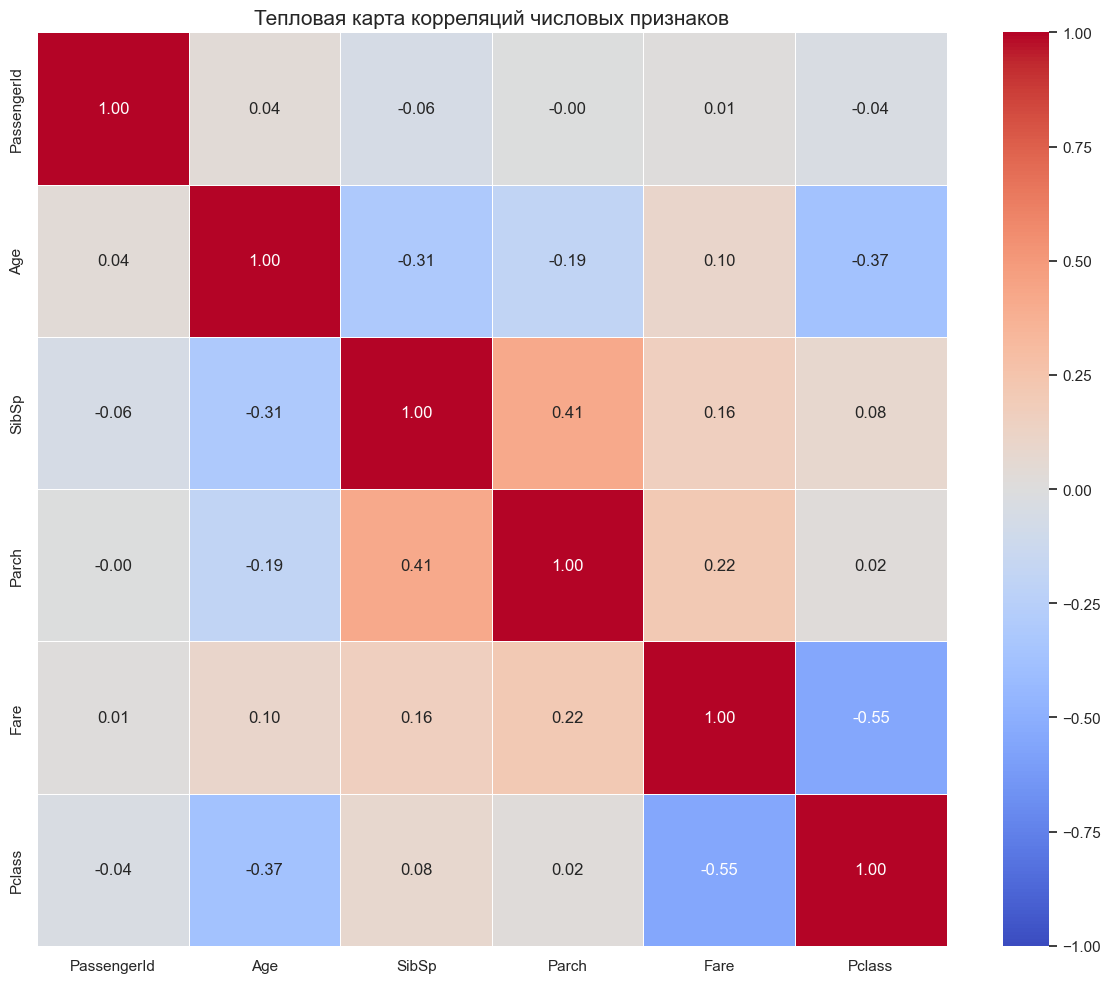

In [151]:
# 3. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ между всеми числовыми признаками
# Создаем числовую матрицу для корреляций
df_corr = df.copy()

# Выбираем числовые признаки для корреляционной матрицы
numeric_corr_features = ['PassengerId', 'Age', 'SibSp', 'Parch', 
                        'Fare', 'Pclass']

# Вычисляем корреляции и отрисовываем тепловую карту
plt.figure(figsize=(12, 10))
corr_matrix = df_corr[numeric_corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций числовых признаков', fontsize=15)
plt.tight_layout()
plt.show()

#### SibSp и Parch имеют умеренную положительную корреляцию (0.41): это логично, поскольку большие семьи обычно включают и братьев/сестер, и родителей/детей

#### Fare (Стоимость билета) имеет слабую положительную корреляцию с:

Parch (0.22) - семьи с детьми, вероятно, покупали более дорогие билеты

SibSp (0.16) - большие группы родственников выбирали более комфортные условия

Age (0.12) - взрослые пассажиры могли позволить себе более дорогие билеты

#### Pclass (социально-экономический статус билета пассажира) имеет умерененную отрицательную корреляцию с:

Age (-0.41) - возрастные люди имели наиболее высокий социальный статус (отрицательный коэффициент, так как первый(высший класс) = 1,
третий(низший класс) = 3)

Fare (-0.55) - дорогие билеты, как правило, были у людей высокого социального статуса


#### Ключевые выводы:

Большинство коэффициентов корреляции находятся в диапазоне от -0.25 до 0.25

Самая значимая положительная корреляция наблюдается между SibSp и Parch (0.41)

Самаая значимая отрицательная корреляция наблюдается между Pclass и Fare (-0.55)

Отсутствие сильных корреляций с Fare: несмотря на интуитивные предположения, стоимость билета слабо коррелирует с другими числовыми признаками

Наличие умеренных отрицательных корреляций нескольких переменных с Pclass




C:\Users\kirya\AppData\Local\Temp\ipykernel_12664\969665280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_12664\969665280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_12664\969665280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_12664\96966

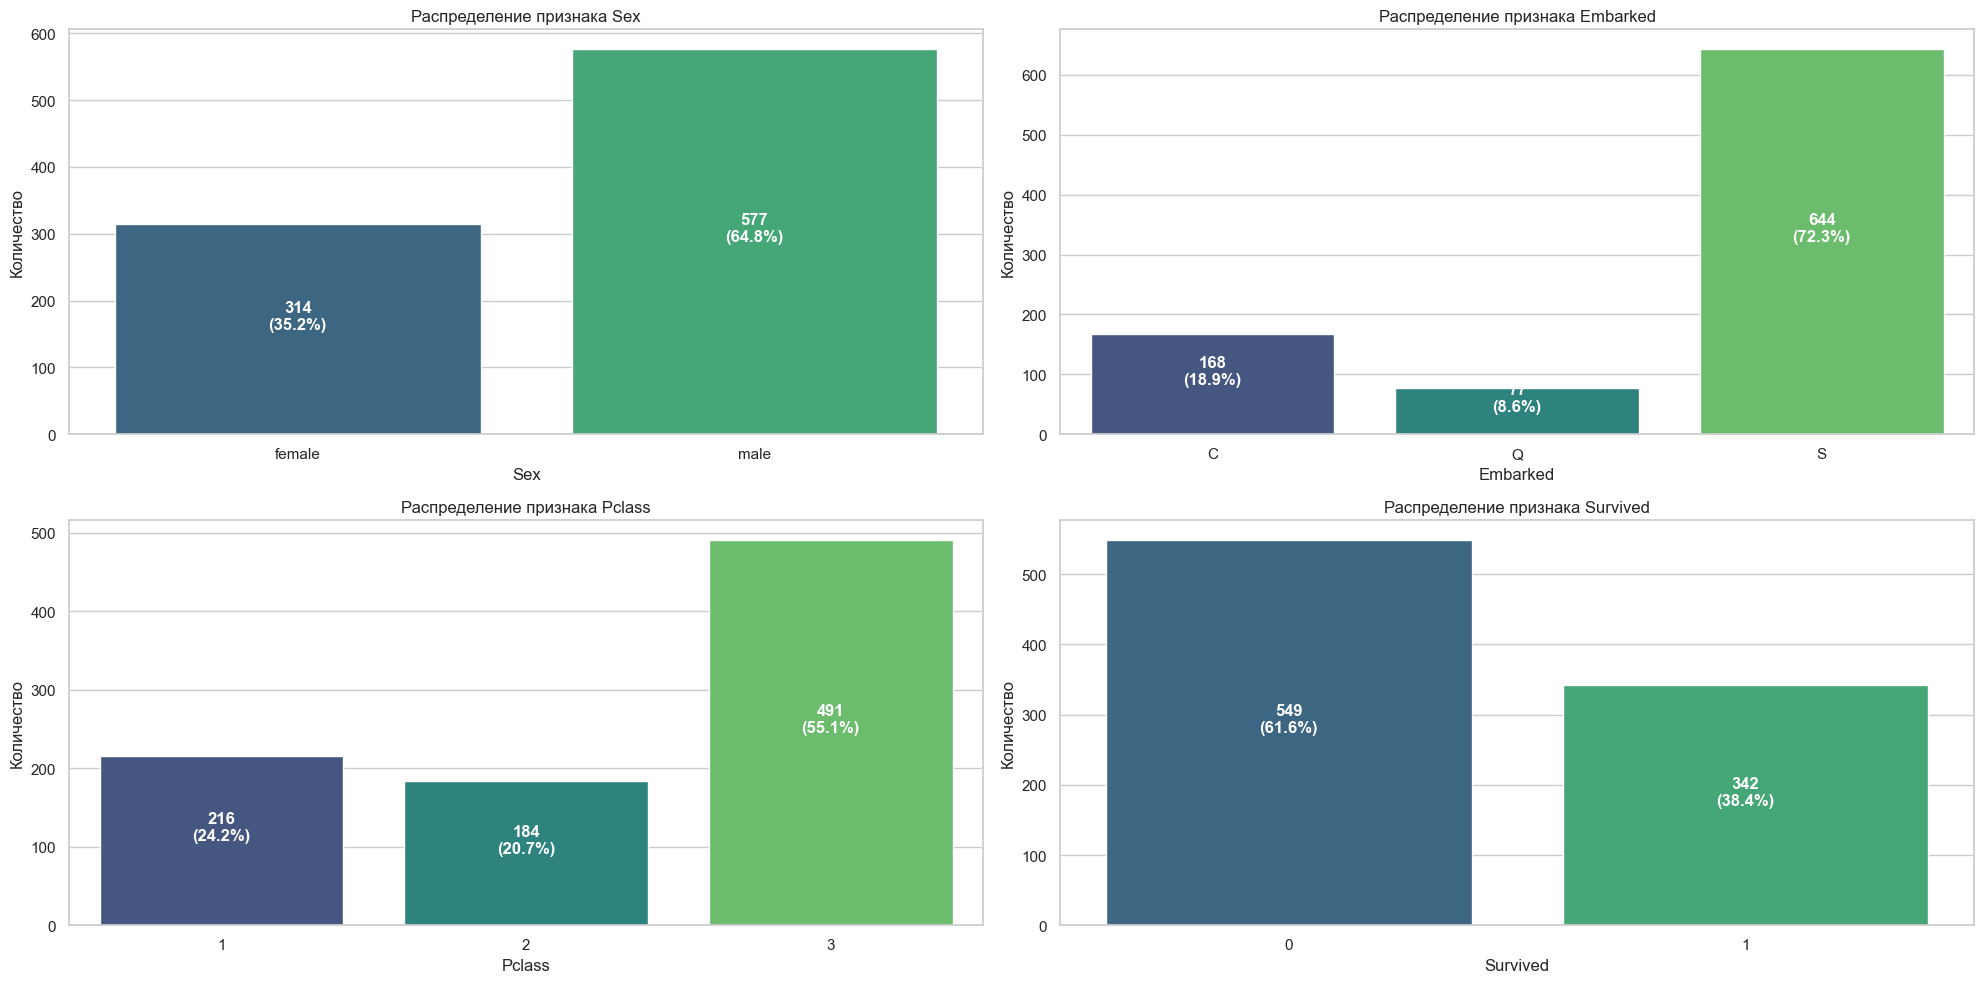

In [152]:
# 4. ГРАФИКИ РАСПРЕДЕЛЕНИЯ категориальных признаков
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Survived']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(2, 2, i+1)  # Изменили на сетку 2×2
        counts = df[feature].value_counts().sort_index()
        sns.barplot(x=counts.index, y=counts.values, palette='viridis')
        plt.title(f'Распределение признака {feature}')
        plt.xlabel(feature)
        plt.ylabel('Количество')
        
        # Добавляем метки с количеством и процентами
        total = len(df)
        for j, v in enumerate(counts.values):
            percentage = v / total * 100
            plt.text(j, v/2, f'{v}\n({percentage:.1f}%)', 
                    horizontalalignment='center',
                    color='white', fontweight='bold')

plt.tight_layout()  # Добавил для лучшего размещения графиков
plt.show()

#### Распределение по полу (Sex):
Мужчин на борту Титаника было значительно больше, чем женщин (около 65% мужчин и 35% женщин)

Это указывает на гендерный дисбаланс среди пассажиров, что может быть важным фактором при анализе выживаемости

#### Распределение по классу (Pclass):
Наибольшее количество пассажиров путешествовало в 3-м классе (более 50%)

Пассажиров 1-го и 2-го классов было примерно одинаковое количество, но значительно меньше, чем пассажиров 3-го класса


#### Распределение по порту посадки (Embarked):
Большинство пассажиров село на корабль в Саутгемптоне (S) - около 70%

Значительно меньше пассажиров село в Шербуре (C) - около 20%

Наименьшее количество пассажиров село в Квинстауне (Q) - около 10%

Выживаемость (Survived):
Всего выжило 342 человека (38,4%), 549 (61.6%) - погибло


### Корреляции с ключевым признаком Survived (таргет)

In [153]:
# Настраиваем стиль графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [154]:
# 1. ГИСТОГРАММЫ для числовых признаков
# Выбираем числовые признаки
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

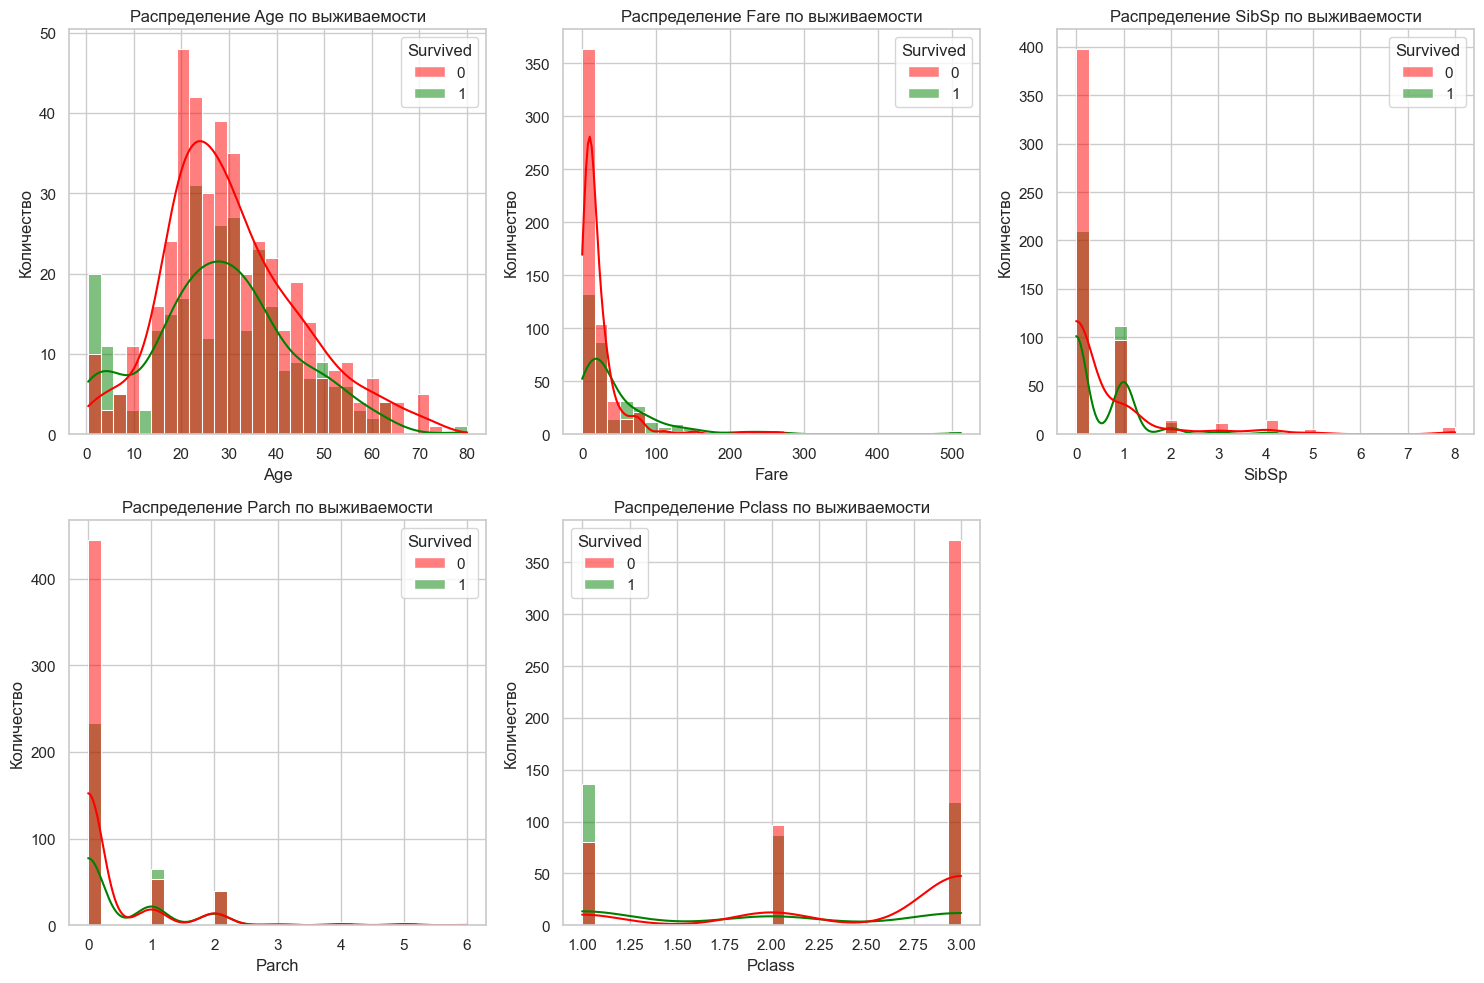

In [155]:
# Отрисовываем гистограммы с разбивкой по выживаемости
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, hue='Survived', bins=30, kde=True, palette=['red', 'green'])
    plt.title(f'Распределение {feature} по выживаемости')
    plt.xlabel(feature)
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()

#### Возраст и выживаемость:
График показывает, что дети и подростки имели более высокие шансы выжить, чем взрослые

У пассажиров среднего и пожилого возраста наблюдается более низкий процент выживших


#### Тариф (Fare) и выживаемость:
Пассажиры, заплатившие более высокую цену за билет, имели значительно более высокие шансы на выживание

Это может объясняться тем, что пассажиры первого класса (с более дорогими билетами) имели лучший доступ к спасательным шлюпкам

#### SibSp (количество братьев/сестер/супругов) и выживаемость:
Пассажиры с 1 родственников выживали чаще, чем одинокие пассажиры ( в процентах)

Однако при большем количестве сопровождающих родственников (более 1) шансы на выживание резко падали

#### Parch (количество родителей/детей) и выживаемость:

Подобно SibSp, наличие 1-2 родителей или детей положительно влияло на шансы выживания

При большем количестве родственников шансы на выживание снижались

#### Эти данные свидетельствуют о явных социальных паттернах спасения на Титанике: приоритет отдавался пассажирам высших классов (с более дорогими билетами), женщинам и детям, а также небольшим семьям, которые могли более эффективно организовать свою эвакуацию, чем крупные семейные группы.

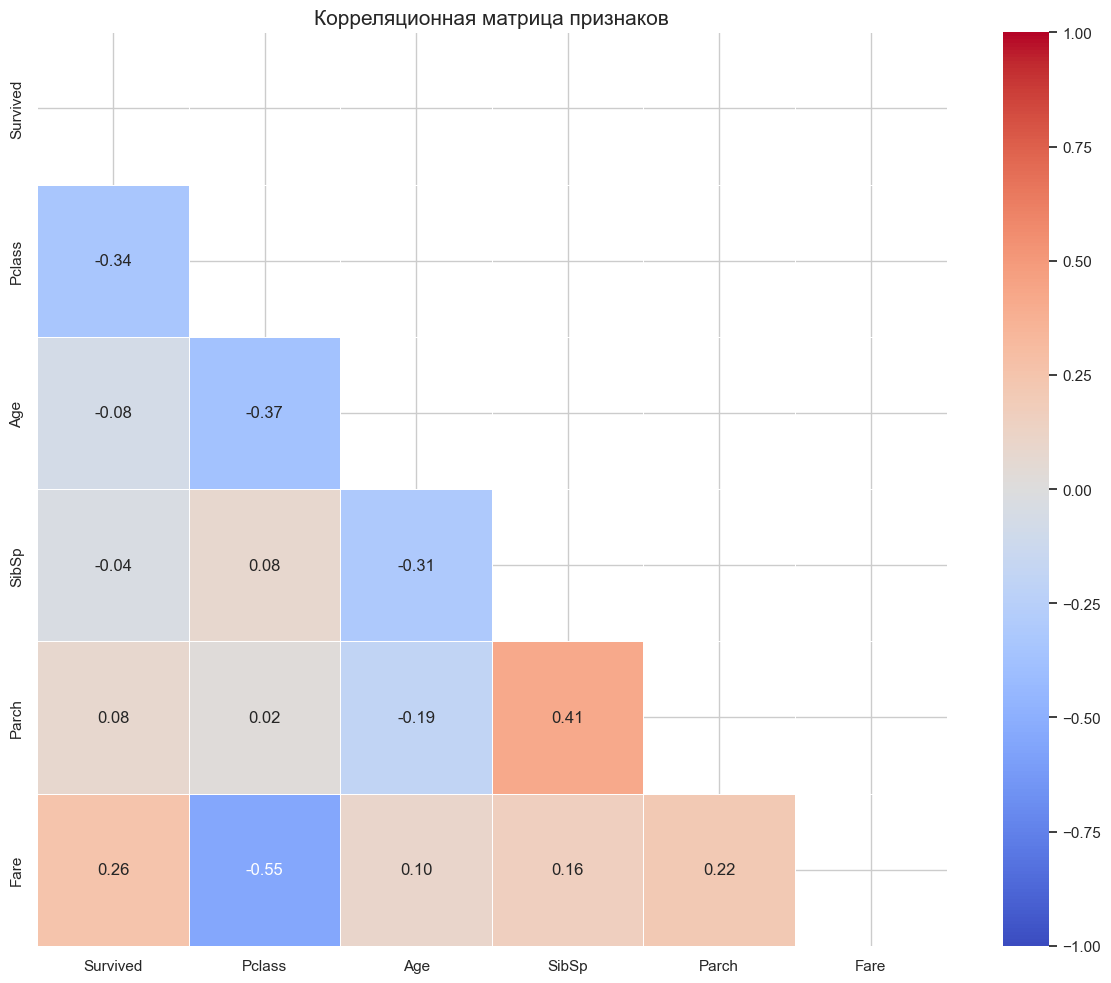

In [156]:
# 3. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ
# Выбираем признаки для корреляционной матрицы
corr_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 
                 'Fare']

# Вычисляем корреляции и отрисовываем тепловую карту
plt.figure(figsize=(12, 10))
corr_matrix = df_corr[corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Корреляционная матрица признаков', fontsize=15)
plt.tight_layout()
plt.show()

#### Выживаемость (Survived) имеет следующие корреляции:
Умеренная отрицательная корреляция с классом билета (Pclass) (примерно -0.34) - пассажиры первого класса имели больше шансов выжить

Слабая положительная корреляция с плата за проезд (Fare) (примерно 0.26) - более дорогие билеты связаны с большей выживаемостью

#### Вероятно, значительные корреляции можно выявить с признаками Sex и Cabin, но для этого следует выполнить предобработку всех данных


# 👨‍💻Feature Engineering

In [157]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Пропущенные значения': missing_values, 'Процент': missing_percent})
missing_df[missing_df['Пропущенные значения'] > 0].sort_values('Пропущенные значения', ascending=False)


Пропущенные значения:


,Пропущенные значения,Процент
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


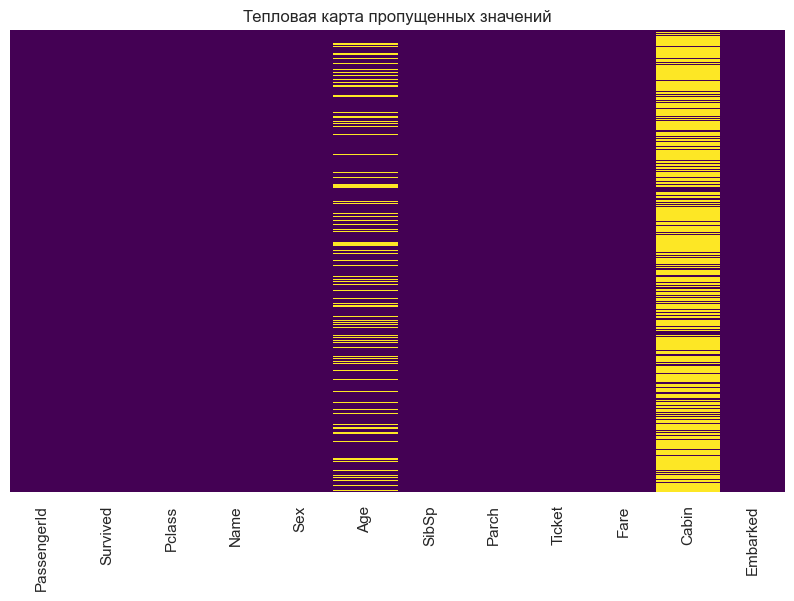

In [158]:
# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

Видим, что больше всего пропущенных в столбце 'Cabin', затем в 'Age', и всего 2 в 'Embarked'. В 'Cabin' не будем ничего заполнять, так как пропущенных значений больше половины, поэтому создадим новый столбец, который будет отображать бинарный признак (есть каюта/нет каюты).  Для 'Age' сделаем заполнение по принципу предсказания по группам (на основе класса и пола). 'Embarked' заполним самыми частыми значениями.

### Обработка пропущенных значений

In [159]:
# Предсказание по группам
age_by_pclass_sex = df.groupby(['Pclass', 'Sex'])['Age'].median()
   
# Функция для заполнения возраста на основе класса и пола
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_by_pclass_sex[row['Pclass'], row['Sex']]
    return row['Age']
   
df['Age'] = df.apply(fill_age, axis=1)

In [160]:
# Заполнение наиболее частым значением
most_common_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_port, inplace=True)

C:\Users\kirya\AppData\Local\Temp\ipykernel_12664\3807378017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_port, inplace=True)


In [161]:
# Создание признака наличия каюты (бинарный признак)
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

In [162]:
# Проверка на наличие пропусков после обработки
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64


#### Добавление и преобразование признаков

In [163]:
# Создание признака наличия семьи (FamilySize)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 учитывает самого пассажира

Признак FamilySize создается путем сложения значений признаков SibSp (количество братьев/сестер и супругов на борту) и Parch (количество родителей/детей на борту) и добавления 1 для учета самого пассажира

Преобразуем некоторые категориальные признаки в числовые, чтобы выявить корреляции

In [164]:
# Для признака Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #0 - мужчина, 1 - женщина

In [165]:
# Для признака Embarked
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2} #0 - Southampton, 1 - Cherbourg, 2 - Queenstown
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [166]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,1,2,W./C. 6607,23.4500,NaN,0,0,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,1,1


### Поиск и обработка выбросов

In [167]:
# Анализ выбросов в числовых данных
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

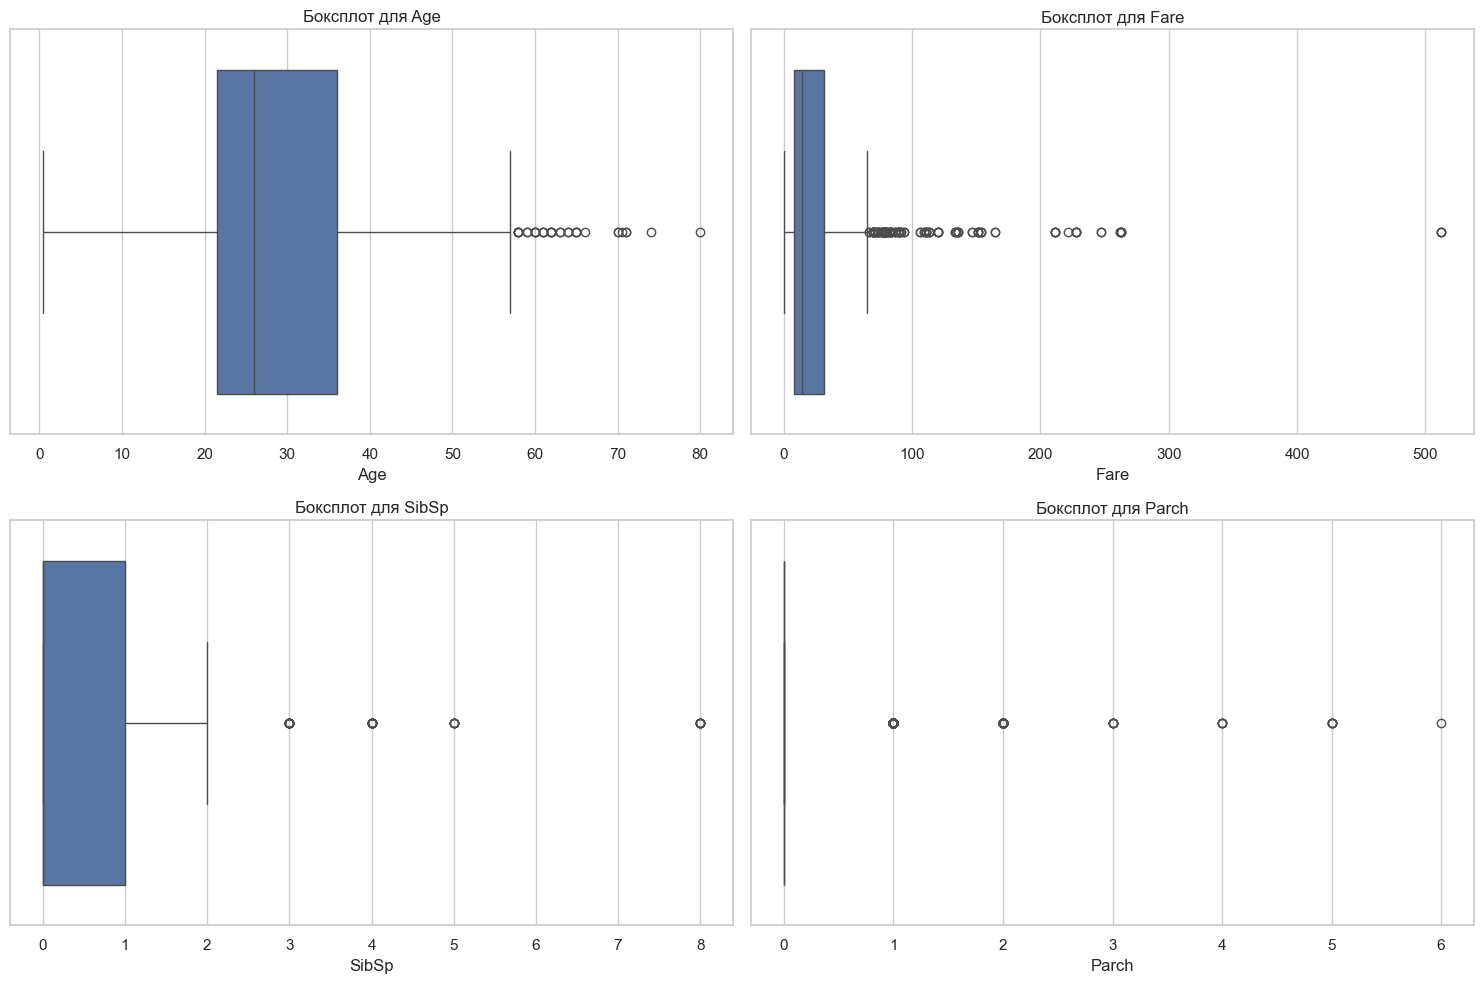

In [168]:
# Боксплоты для визуализации выбросов
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Боксплот для {column}')
plt.tight_layout()
plt.show()

Выбросы являются допустимыми, кроме Fare. Здесь мы выполним их обработку, ограничив возможные значения до 300.

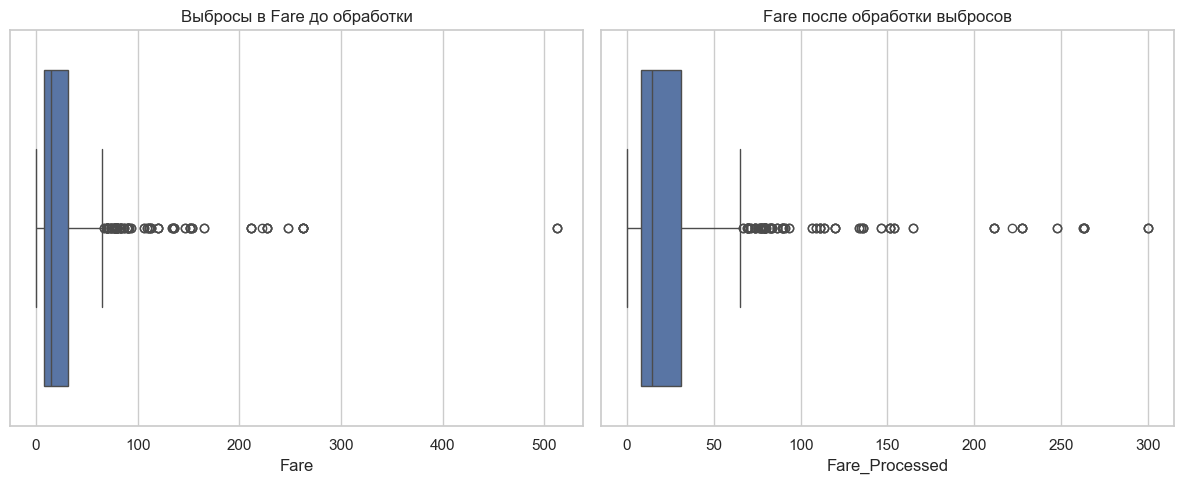

Статистика признака Fare до обработки:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Статистика признака Fare после обработки:
count    891.000000
mean      31.489295
std       43.973014
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      300.000000
Name: Fare_Processed, dtype: float64


In [169]:

upper_limit = 300

# Визуализация выбросов до обработки
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('Выбросы в Fare до обработки')

# Обработка выбросов методом ограничения 
df['Fare_Processed'] = df['Fare'].copy()
df.loc[df['Fare'] > upper_limit, 'Fare_Processed'] = upper_limit

# Визуализация после обработки
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare_Processed'])
plt.title('Fare после обработки выбросов')
plt.tight_layout()
plt.show()

# Анализ до и после обработки
print("Статистика признака Fare до обработки:")
print(df['Fare'].describe())
print("\nСтатистика признака Fare после обработки:")
print(df['Fare_Processed'].describe())

In [170]:
# Заменяем исходный признак Fare на обработанный Fare_Processed
df['Fare'] = df['Fare_Processed']
df.drop('Fare_Processed', axis=1, inplace=True)

#### Корреляция новых колонок с таргетом (Survived)

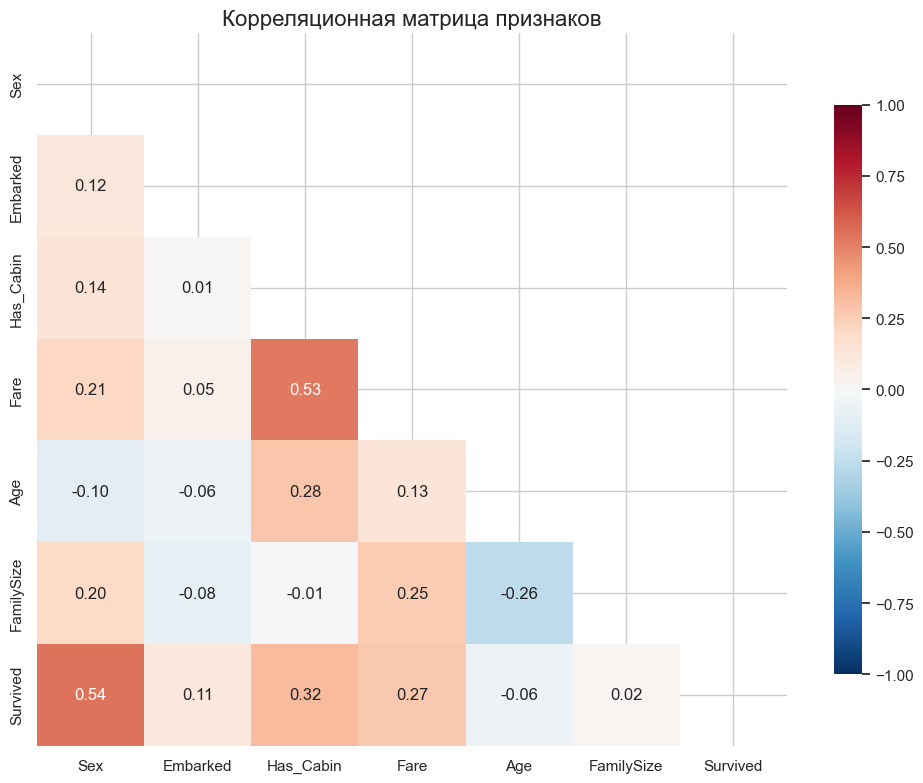

In [171]:
# Анализ корреляции признаков с целевой переменной Survived
features_to_analyze = ['Sex', 'Embarked', 'Has_Cabin', 'Fare', 'Age', 'FamilySize', 'Survived']

# Создаем тепловую карту корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = df[features_to_analyze].corr()

# Визуализируем корреляцию с целевой переменной
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu_r', 
            mask=mask, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Корреляционная матрица признаков', fontsize=16)
plt.tight_layout()
plt.show()


Пол (Sex) имеет самую сильную положительную корреляцию с выживаемостью (0.54). Это указывает на то, что женщины (1) имели значительно больше шансов выжить, чем мужчины (0)

Наличие каюты (Has_Cabin) также положительно коррелирует с выживаемостью (0.32). Пассажиры, имевшие каюты, с большей вероятностью выживали

Стоимость билета (Fare) показывает положительную корреляцию (0.27) с выживаемостью. Пассажиры с более дорогими билетами чаще выживали

Порт посадки (Embarked) имеет слабую положительную корреляцию (0.11) с выживаемостью

Размер семьи (FamilySize) практически не коррелирует с выживаемостью (0.02), что указывает на то, что размер семьи сам по себе не был решающим фактором

Возраст (Age) показывает слабую отрицательную корреляцию (-0.06) с выживаемостью. Люди более старшего возраста имели несколько меньшие шансы на выживание

Интересна сильная корреляция между Has_Cabin и Fare (0.53) - это логично, так как наличие каюты обычно означало более дорогой билет

FamilySize отрицательно коррелирует с Age (-0.26) - это может указывать на то, что семьи с детьми обычно имели больший размер

Sex положительно коррелирует с FamilySize (0.20) и Fare (0.21) - возможно, женщины чаще путешествовали в составе семей и на более дорогих билетах

#### Главный вывод: наиболее важным фактором для выживания был пол пассажира, затем наличие каюты и стоимость билета.

# 👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Определение признаков и целевой переменной
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Has_Cabin', 'FamilySize']
X = df[features]
y = df['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Словарь для хранения моделей
models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Дерево решений': DecisionTreeClassifier(random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Нейронная сеть': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
}

# Оценка моделей на test-выборке
test_results = {}
for name, model in models.items():
    if name in ['Логистическая регрессия', 'Нейронная сеть']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_results[name] = acc
    print(f"{name}: Accuracy на test = {acc:.4f}")

# Выбор лучшей модели по test-выборке
best_test_model_name = max(test_results, key=test_results.get)
print(f"\nЛучшая модель по test-выборке: {best_test_model_name} с точностью {test_results[best_test_model_name]:.4f}")

# Подробный отчёт по лучшей модели
best_test_model = models[best_test_model_name]
if best_test_model_name in ['Логистическая регрессия', 'Нейронная сеть']:
    y_pred = best_test_model.predict(X_test_scaled)
else:
    y_pred = best_test_model.predict(X_test)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Важность признаков для интерпретируемых моделей
if best_test_model_name in ['Случайный лес', 'Градиентный бустинг', 'XGBoost']:
    importances = best_test_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Признак': features,
        'Важность': importances
    }).sort_values('Важность', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Важность', y='Признак', data=feature_importance)
    plt.title(f'Важность признаков для модели {best_test_model_name}')
    plt.tight_layout()
    plt.show()
    print("\nВажность признаков:")
    print(feature_importance)

Логистическая регрессия: Accuracy на test = 0.8212
Дерево решений: Accuracy на test = 0.7933
Случайный лес: Accuracy на test = 0.8101
Градиентный бустинг: Accuracy на test = 0.8212
XGBoost: Accuracy на test = 0.8101
Нейронная сеть: Accuracy на test = 0.8268

Лучшая модель по test-выборке: Нейронная сеть с точностью 0.8268

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [173]:
from sklearn.model_selection import cross_val_score, KFold

# Определяем, какие данные использовать для кросс-валидации (масштабированные или нет)
if best_test_model_name in ['Логистическая регрессия', 'Нейронная сеть']:
    X_cv = scaler.fit_transform(X)
else:
    X_cv = X

# Кросс-валидация (5 фолдов)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_test_model, X_cv, y, cv=cv, scoring='accuracy')

print(f"\nКросс-валидация для {best_test_model_name}:")
print(f"Accuracy по фолдам: {cv_scores}")
print(f"Средняя accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Кросс-валидация для Нейронная сеть:
Accuracy по фолдам: [0.81564246 0.8258427  0.83707865 0.79775281 0.81460674]
Средняя accuracy: 0.8182 ± 0.0131


#### Для улучшения результата accuracy попробуем использовать ансамбли

In [174]:
from sklearn.ensemble import VotingClassifier

# Список базовых моделей для ансамбля
voting_estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42))
]

# Для моделей, чувствительных к масштабу, используем масштабированные данные
voting_clf = VotingClassifier(estimators=voting_estimators, voting='soft')

# Обучение и оценка на test
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
acc_voting = accuracy_score(y_test, y_pred_voting)
print(f"VotingClassifier Accuracy на test = {acc_voting:.4f}")

VotingClassifier Accuracy на test = 0.8492


In [175]:
from sklearn.ensemble import StackingClassifier

stacking_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42))
]

# Логистическая регрессия как мета-алгоритм
stacking_clf = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    passthrough=True
)

stacking_clf.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"StackingClassifier Accuracy на test = {acc_stacking:.4f}")

StackingClassifier Accuracy на test = 0.8324


In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
voting_cv = cross_val_score(voting_clf, scaler.fit_transform(X), y, cv=cv, scoring='accuracy')
stacking_cv = cross_val_score(stacking_clf, scaler.fit_transform(X), y, cv=cv, scoring='accuracy')

print(f"VotingClassifier CV: {voting_cv.mean():.4f} ± {voting_cv.std():.4f}")
print(f"StackingClassifier CV: {stacking_cv.mean():.4f} ± {stacking_cv.std():.4f}")

VotingClassifier CV: 0.8305 ± 0.0207
StackingClassifier CV: 0.8316 ± 0.0258


# Выводы
Лучшая классическая модель для предсказания на тестовой выборке - нейронная сеть MLP с результатом accuracy на test = 0.8268 и средней accuracy 0.8182 ± 0.0131 при кросс-валидации (5 фолдов)

Базовые модели (логистическая регрессия, деревья, случайный лес, бустинг, XGBoost) показали среднюю точность на тестовой выборке в диапазоне 0.78–0.82)

Кросс-валидация (5 фолдов) показала, что средняя accuracy чуть ниже, чем на одном test-сплите, что ожидаемо и говорит о том, что модель не переобучается под конкретное разбиение. Разброс accuracy по фолдам связан с небольшим размером датасета и неравномерным распределением классов

Ансамбли (Voting, Stacking) дают ощутимый прирост точности по сравнению с одиночными моделями. VotingClassifier accuracy на test = 0.8492, а при кросс-валидации (5 фолдов) VotingClassifier средний accuracy на test = 0.8305 ± 0.0207. StackingClassifier Accuracy на test = 0.8324, при кросс-валидации (5 фолдов) StackingClassifier средний accuracy = 0.8316 ± 0.0258

Это подтверждает, что комбинация разных подходов позволяет чуть лучше обобщать паттерны в данных

Нейронная сеть (MLP) иногда не успевает сойтись за 1000 эпох, но даже в этом случае её качество сопоставимо с классическими моделями.

